In [1]:
historical_automobile_sales.csv

NameError: name 'historical_automobile_sales' is not defined

In [2]:
!pip install seaborn
!pip install folium

In [3]:
!pip install inline

  Created wheel for inline: filename=inline-0.0.1-py3-none-any.whl size=3327 sha256=7e3248215f9e6686c9ca4d9936a0d343129b43a91b186054100ba439d2939b2b
  Stored in directory: c:\users\mansi\appdata\local\pip\cache\wheels\de\89\5e\ad81ca8035fea7a6ccd527b2ab81222439fa75ab749657ee0b
Successfully built inline


In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [8]:
import pandas as pd

# URL of the file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Load the CSV directly into a DataFrame
df = pd.read_csv(URL)

# Display the first few rows
print(df.head())


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

In [9]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [10]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# #Creating Visualizations for Data Analysis

TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

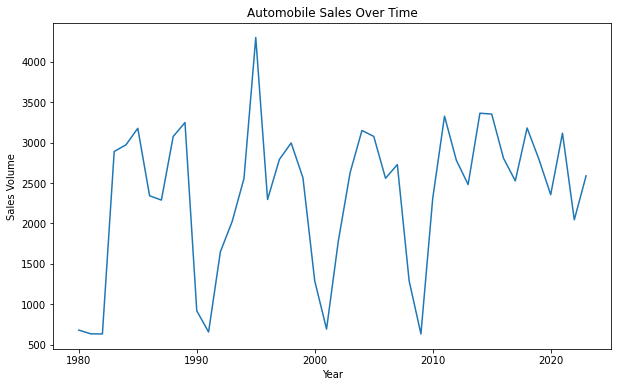

In [13]:
plt.figure(figsize = (10,6))
df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind='line',x=df_line.index,y=df_line.values)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.show()

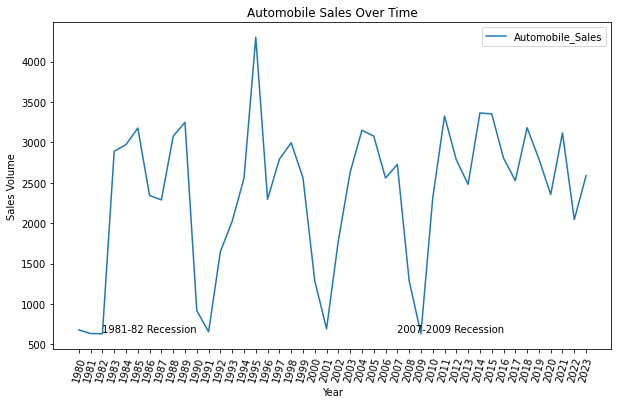

In [14]:
plt.figure(figsize =(10,6))
df_line = df.groupby('Year')['Automobile_Sales'].mean()
df_line.plot(kind='line',x=df_line.index,y=df_line.values)
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales Over Time')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2007,650, '2007-2009 Recession')
plt.legend()
plt.show()

TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

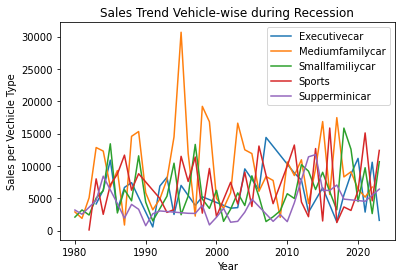

In [15]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales per Vechicle Type')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()


TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

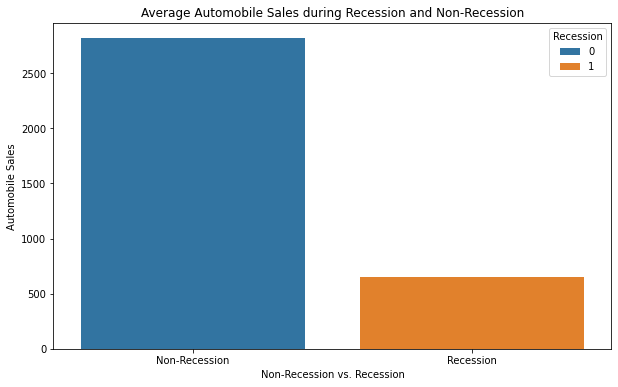

In [16]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Recession',y='Automobile_Sales', hue='Recession', data = new_df)
plt.xlabel('Non-Recession vs. Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0,1], labels =['Non-Recession','Recession'])
plt.show()


Now you want to compare the sales of different vehicle types during a recession and a non-recession period

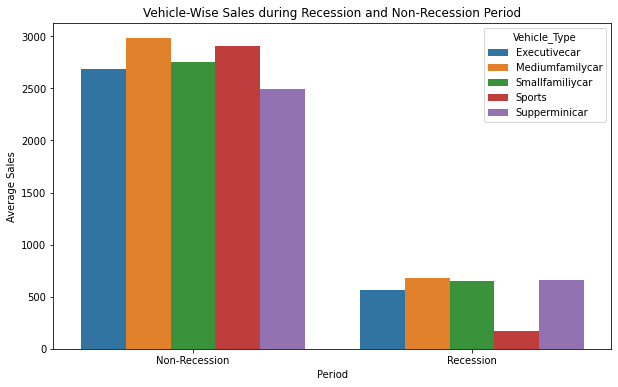

In [17]:
recession_data = df[df['Recession'] == 1]

group_data=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=group_data)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

From the above chart what insights have you gained on the overall sales of automobiles during recession?
Type your answer below:-
The above chart shows the change of sales of all vehicle type decline during the recession period. Specifically the sports type vehicle dropped the most.

Inference
From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


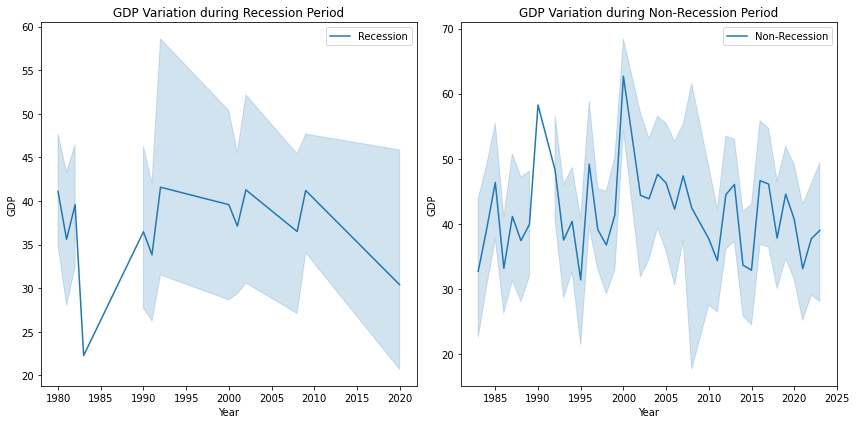

In [18]:
recession_data = df[df['Recession'] ==1]
non_recession_data = df[df['Recession']== 0]

figure = plt.figure(figsize=(12,6))

ax = figure.add_subplot(1,2,1)
ax1 = figure.add_subplot(1,2,2)

plt.subplot(1,2,1)
sns.lineplot(x='Year',y='GDP', data = recession_data, label='Recession', ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('GDP')
ax.set_title('GDP Variation during Recession Period')

plt.subplot(1,2,2)
sns.lineplot(x='Year',y='GDP', data = non_recession_data, label='Non-Recession', ax = ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company


TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.


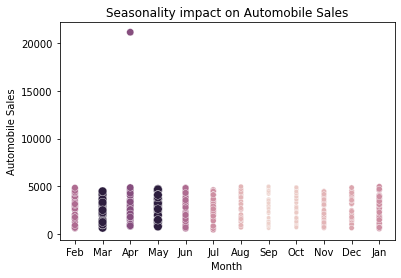

In [19]:
non_recession_data = df[df['Recession']== 0]

size = non_recession_data['Seasonality_Weight']

sns.scatterplot(data= non_recession_data, x='Month',y='Automobile_Sales',size=size,hue ='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

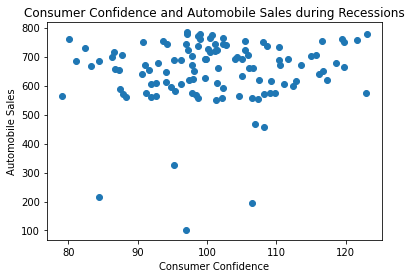

In [20]:
recession_data1 = df[df['Recession'] == 1]
non_recession_data1 = df[df['Recession']== 0]

plt.scatter(recession_data['Consumer_Confidence'],recession_data1['Automobile_Sales'])
            
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

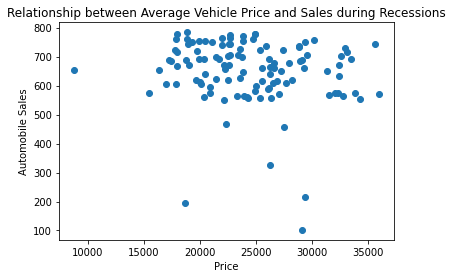

In [21]:
recession_data1 = df[df['Recession'] == 1]
non_recession_data = df[df['Recession']== 0]

plt.scatter(recession_data['Price'],recession_data1['Automobile_Sales'])
            
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


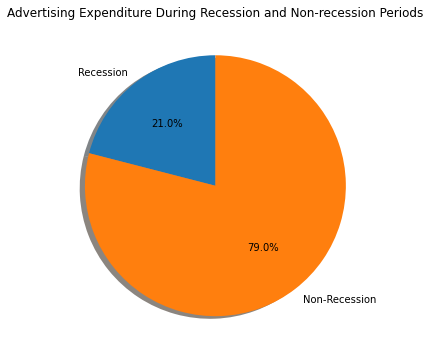

In [22]:
recession_data2 = df[df['Recession'] == 1]
non_recession_data2 = df[df['Recession']== 0]

recession_total = recession_data2['Advertising_Expenditure'].sum()
non_recession_total = non_recession_data2['Advertising_Expenditure'].sum()

plt.figure(figsize=(8,6))

labels = ['Recession','Non-Recession']
sizes = [recession_total,non_recession_total]
plt.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},startangle=90)

plt.title('Advertising Expenditure During Recession and Non-recession Periods')

plt.show()

From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?
Type your answer below:-
The chart shows that companies spent more on advertisement during non-recession period over recession period, which is fair enough for the situation.

Inference It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

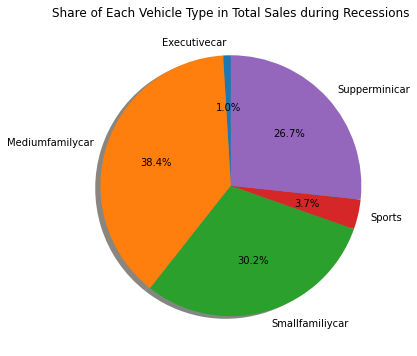

In [23]:
recession_data3 = df[df['Recession'] == 1]

Vec_sales = recession_data3.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8,6))

labels = Vec_sales.index
sizes = Vec_sales.values
plt.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


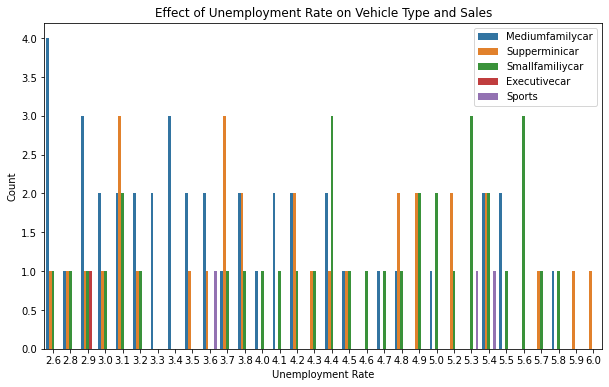

In [24]:
recession_data3 = df[df['Recession'] == 1]

plt.figure(figsize=(10,6))

sns.countplot( data = recession_data3, x='unemployment_rate',hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?
Type your answer below:-
Buying pattern changed on superminicar,smallfamilycar,mediumfamilycar.

Inference During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar
